# Introduction to ConWhAt

In [1]:
import sys
sys.path.append('/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt')

- spiel on ontology vs. representation

### Volumetric Tract-based Atlases

In [2]:
from conwhat import VolTractAtlas

Initialize a JHU atlas

In [3]:
vta_jhu = VolTractAtlas('JHU')

loading file mapping
loading vol bbox


The file mappings

In [4]:
vta_jhu.vfms.head()

name  \
0  Anterior thalamic radiation L   
1  Anterior thalamic radiation R   
2          Corticospinal tract L   
3          Corticospinal tract R   
4   Cingulum (cingulate gyrus) L   

                                            nii_file  nii_file_id  4dvolind  
0  /usr/share/fsl/data/atlases/JHU/JHU-ICBM-tract...            0         0  
1  /usr/share/fsl/data/atlases/JHU/JHU-ICBM-tract...            0         1  
2  /usr/share/fsl/data/atlases/JHU/JHU-ICBM-tract...            0         2  
3  /usr/share/fsl/data/atlases/JHU/JHU-ICBM-tract...            0         3  
4  /usr/share/fsl/data/atlases/JHU/JHU-ICBM-tract...            0         4

We also keep coordinates (currently array indices) of the outermost points of each atlas entry. 

In [5]:
vta_jhu.bbox.head()

xmin  xmax  ymin  ymax  zmin  zmax
0    44    72    22   100     3    72
1    18    55    12   100     3    55
2    38    70    27    59     0    70
3    24    54    24    61     0    54
4    41    56    22    96    30    56

This substantially speeds up things like lesion overlap calculations, because we only need check atlas entries whose bounding box overlaps with he lesion map bounding box. Obviously we could retain more detailed indexing information and reduce redundant searching even more; but this approach turns out to be a very good, extremely minimal heuristic. 

In [6]:
#vta_jhu.plot_tract()

## Volumetric connectome-based atlases

In [7]:
from joblib import Parallel,delayed
temp_folder=None

In [8]:
import sys
sys.path.append('/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt')

In [11]:
cw_vca = VolConnAtlas('CW_l2k8sc33')

loading file mapping
loading vol bbox
loading connectivity


In [12]:
cw_vca.vfms.head()

name                          nii_file  nii_file_id  4dvolind
0  0_to_1  vismap_grp_cat_rois1_norm.nii.gz            0         0
1  0_to_2  vismap_grp_cat_rois1_norm.nii.gz            0         1
2  0_to_3  vismap_grp_cat_rois1_norm.nii.gz            0         2
3  0_to_4  vismap_grp_cat_rois1_norm.nii.gz            0         3
4  0_to_5  vismap_grp_cat_rois1_norm.nii.gz            0         4

In [13]:
cw_vca.bbox.head()

xmin  xmax  ymin  ymax  zmin  zmax
0    39    86    52   186    38    86
1    42    88   136   192    40    88
2    44   108   133   189    35   108
3    37    82   135   187    42    82
4    38    64   128   163    65    64

additional connectivity stuff as well:

In [14]:
cw_vca.weights

array([[  1.45154003e+04,   1.43692905e+03,   4.10817568e+02, ...,
          1.85810811e-02,   0.00000000e+00,   3.56418919e-01],
       [  1.43692905e+03,   3.28754899e+03,   1.05954392e+02, ...,
          9.96621622e-02,   0.00000000e+00,   1.21621622e-01],
       [  4.10817568e+02,   1.05954392e+02,   6.68033784e+02, ...,
          1.01351351e-02,   0.00000000e+00,   4.56081081e-02],
       ..., 
       [  1.85810811e-02,   9.96621622e-02,   1.01351351e-02, ...,
          4.35354730e+02,   3.48125000e+01,   2.02702703e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.48125000e+01,   9.18581081e+00,   0.00000000e+00],
       [  3.56418919e-01,   1.21621622e-01,   4.56081081e-02, ...,
          2.02702703e-02,   0.00000000e+00,   5.91216216e-02]])

In [15]:
cw_vca.region_labels[:10]

['L_lateralorbitofrontal',
 'L_parsorbitalis',
 'L_frontalpole',
 'L_medialorbitofrontal',
 'L_parstriangularis',
 'L_parsopercularis',
 'L_rostralmiddlefrontal',
 'L_superiorfrontal',
 'L_caudalmiddlefrontal',
 'L_precentral']

In [16]:
cw_vca.hemispheres

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [17]:
cw_vca.cortex

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [18]:
cw_vca.region_mapping_fsav_lh

array([ 24.,  29.,  28., ...,  16.,   7.,   7.])

In [19]:
cw_vca.region_mapping_fsav_lh

array([ 24.,  29.,  28., ...,  16.,   7.,   7.])

In [20]:
cw_vca.Gnx

In [21]:
import networkx as nx

In [22]:
nx.to_pandas_dataframe(cw_vca.Gnx).iloc[:5,:5]

0            1           2            3           4
0     0.000000  1436.929054  410.817568  2064.601351  212.695946
1  1436.929054     0.000000  105.954392    48.847973  918.991554
2   410.817568   105.954392    0.000000   388.298986   20.945946
3  2064.601351    48.847973  388.298986     0.000000    4.096284
4   212.695946   918.991554   20.945946     4.096284    0.000000

In [23]:
# plot connectivity etc. now

Now compute hit stats for an ROI


***(only go through a handful of nodes so that it is quick, and so that we can leave the full one for later notebook)***

In [24]:
lesion_file = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/scratch/test_lesionmask_rs1mm.nii.gz'

In [25]:
from datetime import datetime
from joblib import Parallel

In [29]:
start = datetime.now()

In [30]:
idxs = 'all' # range(1,100) #  'all'
df_hit_stats,G_hit_stats = cw_vca.compute_hit_stats(lesion_file,idxs,n_jobs=4)

computing hit stats for roi /home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/scratch/test_lesionmask_rs1mm.nii.gz


In [31]:
finish = datetime.now()

In [32]:
dur = str(finish-start)

In [33]:
dur

'0:16:24.563821'

In [35]:
dur

'0:26:45.733534'

speeding up with memmapping

In [34]:
df_hit_stats.head()

metric             ACC                  BM                 F1             FDR  \
idx                                                                             
46      0.987376042649  -0.000382817103999   0.00449929016053   0.99180161953   
47      0.990351102169  -0.000451738038342                0.0             1.0   
48      0.989446522325    0.00063331850835   0.00350441320693  0.986642718315   
49      0.988724464869    -0.0020338386444  9.82450969556e-05  0.999733090401   
50      0.989426857546   -0.00138456590588                0.0             1.0   

metric     FN             FNR       FP                FPR                 MCC  \
idx                                                                             
46      66237  0.996899598152  24921.0    0.0034832189522  -0.000620719322612   
47      66443             1.0   3232.0  0.000451738038342   -0.00203922677834   
48      66309  0.997983233749   9898.0   0.00138344774242    0.00162348257834   
49      66439  0.999939798022  14982.0   0.00209404062204   -0.00426719095377   
50      66443             1.0   9906.0   0.00138456590588   -0.00357174044164   

metric               MK NPV               PPV       TN             TNR     TP  \
idx                                                                             
46      -0.991801647469   0   0.0081983525306  7129668  0.996516781048  206.0   
47                 -1.0   0               0.0  7151357  0.999548261962    0.0   
48      -0.986642743461   0   0.0133572565392  7144691  0.998616552258  134.0   
49      -0.999733084202   0  0.00026691579842  7139607  0.997905959378    4.0   
50                 -1.0   0               0.0  7144683  0.998615434094    0.0   

metric               TPR   corr_nothr     corr_thr  corr_thrbin  
idx                                                              
46       0.0031004018482  -0.00305852  -0.00305852 -0.000620719  
47                   0.0  -0.00193301  -0.00193301  -0.00203923  
48      0.00201676625077 -0.000306085 -0.000306085   0.00162348  
49      6.0201977635e-05  -0.00391249  -0.00391249  -0.00426719  
50                   0.0  -0.00331288  -0.00331288  -0.00357174

In [35]:
cw_vca.vfms.ix[df_hit_stats.index].head()

name                          nii_file  nii_file_id  4dvolind
idx                                                                  
46   0_to_58  vismap_grp_cat_rois1_norm.nii.gz            0        46
47   0_to_59  vismap_grp_cat_rois1_norm.nii.gz            0        47
48   0_to_60  vismap_grp_cat_rois1_norm.nii.gz            0        48
49   0_to_61  vismap_grp_cat_rois1_norm.nii.gz            0        49
50   0_to_62  vismap_grp_cat_rois1_norm.nii.gz            0        50

In [36]:
G_hit_stats.edge[0][64].keys()

['ACC',
 'FP',
 'FNR',
 'TNR',
 'BM',
 'FDR',
 'corr_nothr',
 'MK',
 'FPR',
 'FN',
 'F1',
 'corr_thrbin',
 'PPV',
 'MCC',
 'TP',
 'TN',
 'corr_thr',
 'NPV',
 'TPR']

In [37]:
df_TPR = nx.to_pandas_dataframe(G_hit_stats,weight='TPR')

In [38]:
df_corr_thrbin = nx.to_pandas_dataframe(G_hit_stats,weight='corr_thrbin')

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

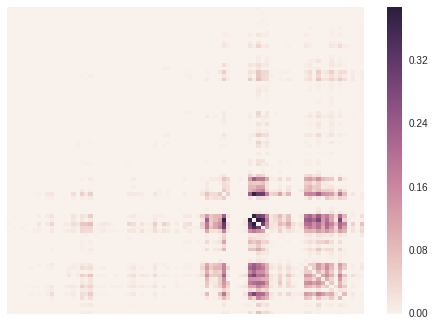

In [40]:
sns.heatmap(df_TPR, xticklabels='',yticklabels='')

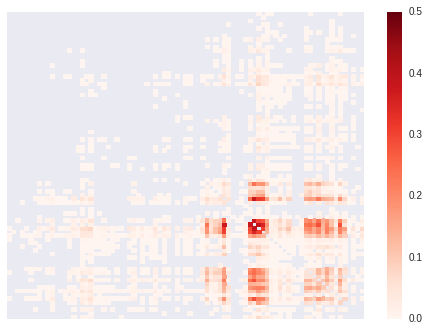

In [41]:
sns.heatmap(df_TPR, xticklabels='',yticklabels='',cmap='Reds',
            mask=df_TPR.values==0,vmin=0,vmax=0.5)
plt.savefig('/home/jgriffiths/Downloads/df_TPR_heatmap.png', bbox_inches='tight',dpi=600)

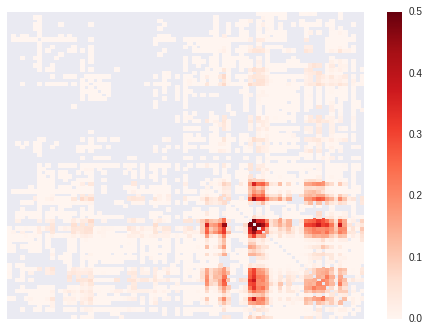

In [42]:
sns.heatmap(df_corr_thrbin, xticklabels='',yticklabels='',cmap='Reds',
            mask=df_corr_thrbin.values==0,vmin=0,vmax=0.5)

In [43]:
from nilearn.plotting import plot_connectome,find_xyz_cut_coords
import nibabel as nib
import numpy as np

In [44]:
f = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/data/CW_l2k8sc33/ROI_scale33.nii.gz'
img = nib.load(f)
dat = img.get_data()
roivals = np.unique(dat)[1:]
ccs = {roival: find_xyz_cut_coords(img, mask=dat==roival,activation_threshold=0) for roival in roivals}
ccs_arr = np.array(ccs.values())

In [45]:
f = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/data/CW_l2k8sc33/weights.txt'
cancon = np.loadtxt(f)

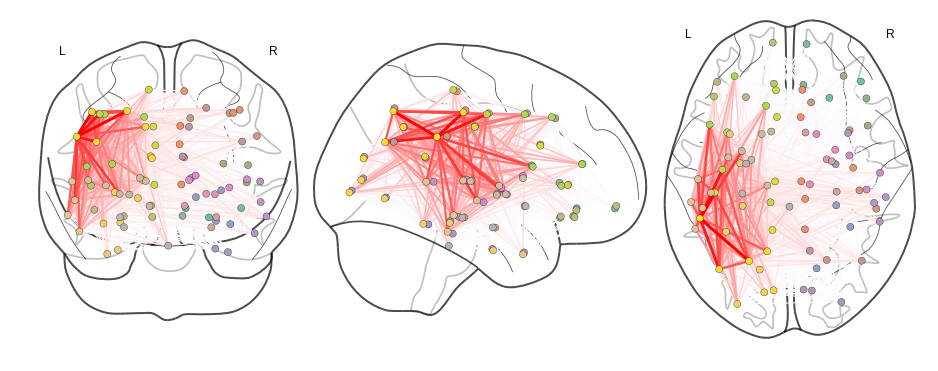

In [46]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_corr_thrbin.values,ccs_arr,axes=ax)

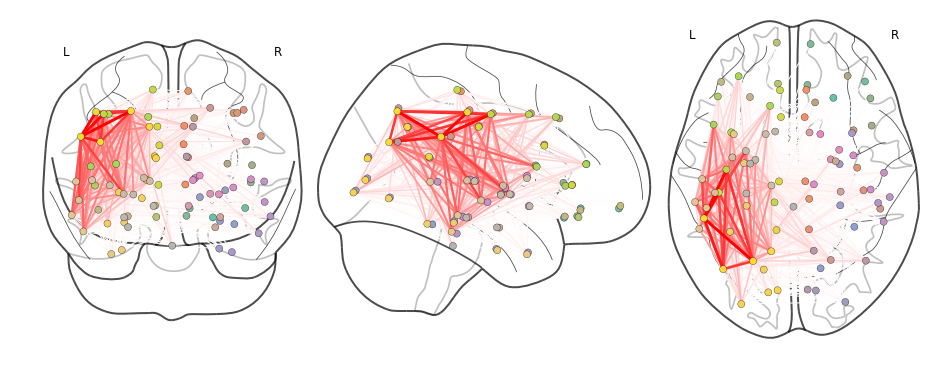

In [75]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax)

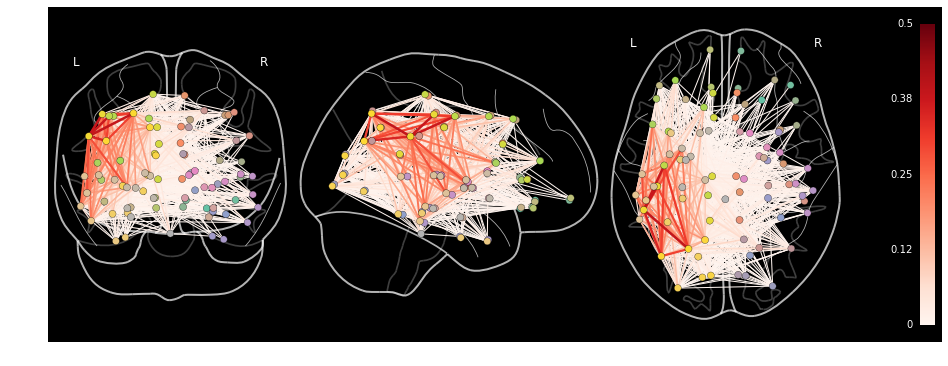

In [80]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds')

In [ ]:
plot_connectome()

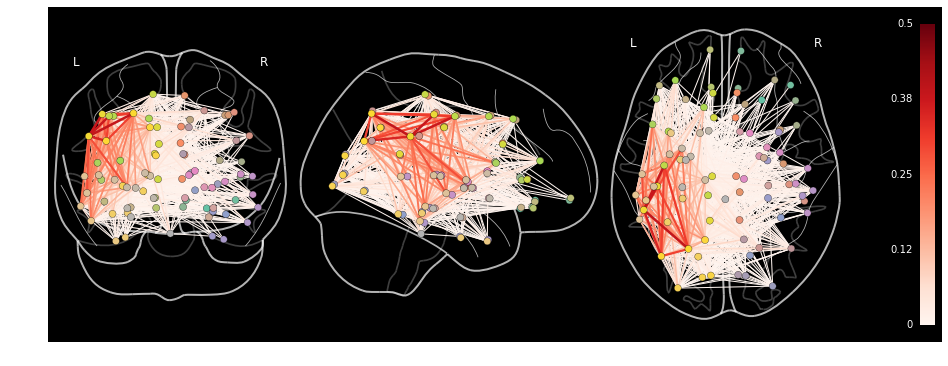

In [82]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95)

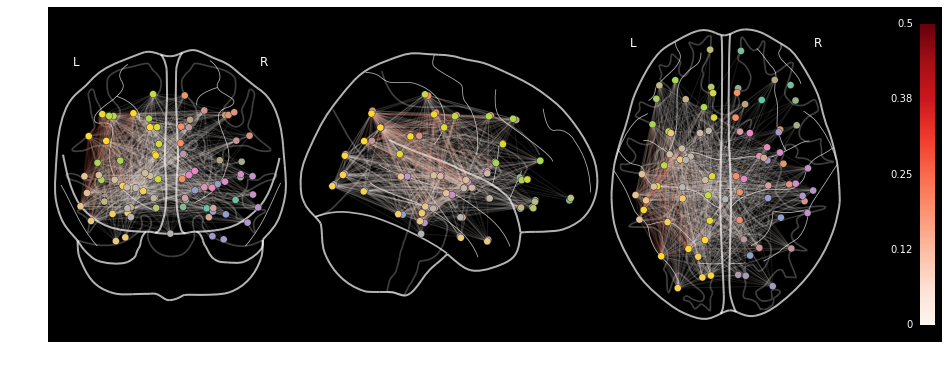

In [84]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.1})

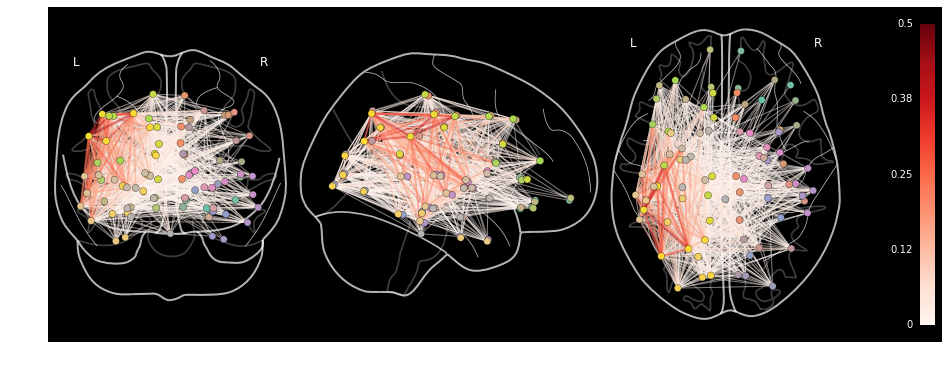

In [85]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.5})

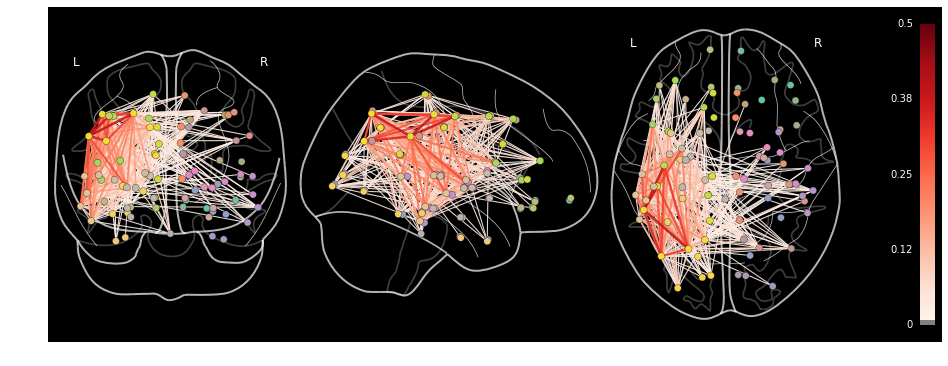

In [87]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01)

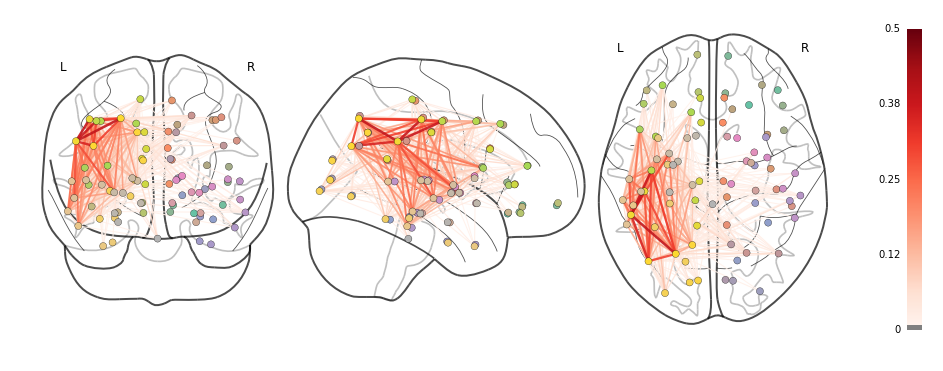

In [88]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=False,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01)

In [89]:
from nilearn.plotting import cm as nl_cm

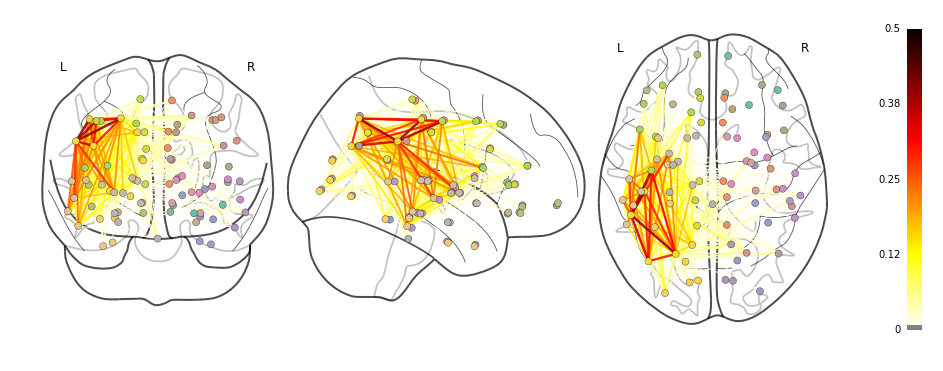

In [91]:
fig, ax = plt.subplots(figsize=(16,6))
plot_connectome(df_TPR.values,ccs_arr,axes=ax,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=False,edge_cmap=nl_cm.black_red_r,
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01)

In [92]:
f = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/scratch/test_lesionmask_rs1mm.nii.gz'

In [93]:
lesion_img = nib.load(f)

In [94]:
from nilearn.plotting import plot_glass_brain

In [96]:
lesion_img_bin = nib.Nifti1Image((lesion_img.get_data()>0).astype(float), lesion_img.affine)

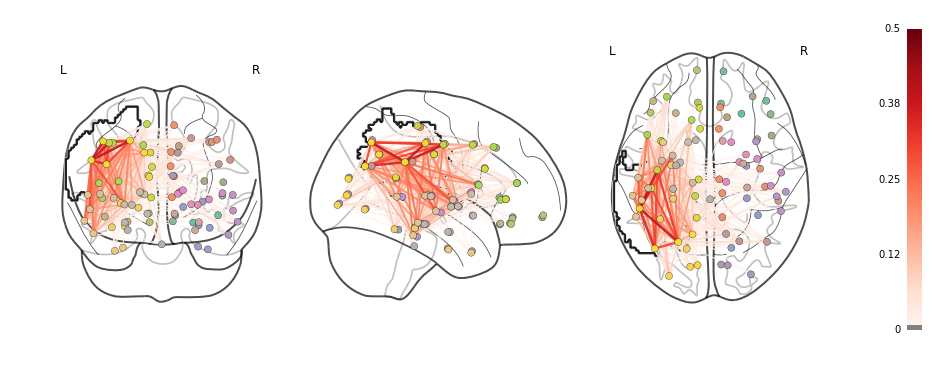

In [103]:
fig, ax = plt.subplots(figsize=(16,6))
display = plot_connectome(df_TPR.values,ccs_arr,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=False,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01,axes=ax)

display.add_contours(lesion_img_bin)#,filled=True)

In [ ]:
display.add_contours()

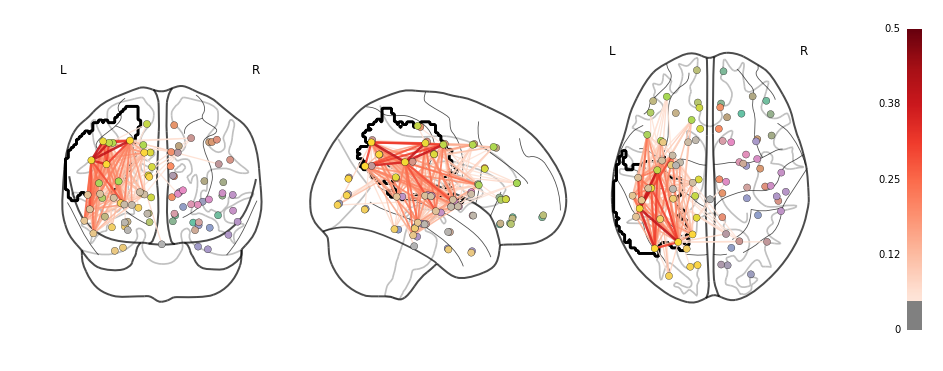

In [111]:
fig, ax = plt.subplots(figsize=(16,6))
display = plot_connectome(df_TPR.values,ccs_arr,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=False,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.05,axes=ax)

display.add_contours(lesion_img_bin,filled=False,colors=['black'])

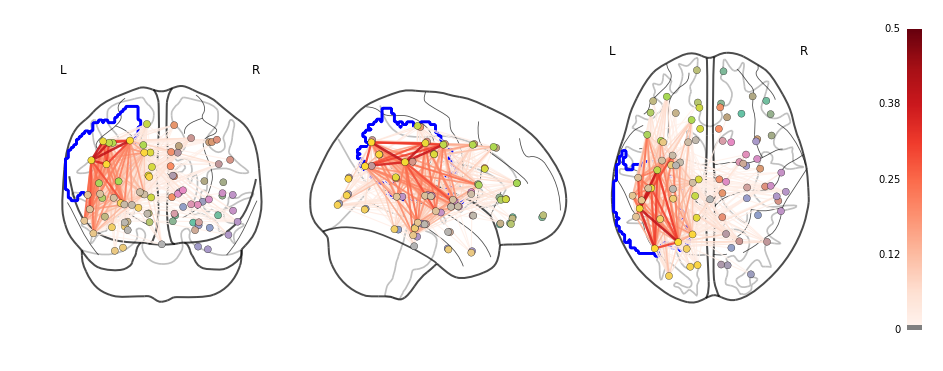

In [108]:
fig, ax = plt.subplots(figsize=(16,6))
display = plot_connectome(df_TPR.values,ccs_arr,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=False,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01,axes=ax)

display.add_contours(lesion_img_bin,filled=False,colors=['blue'])

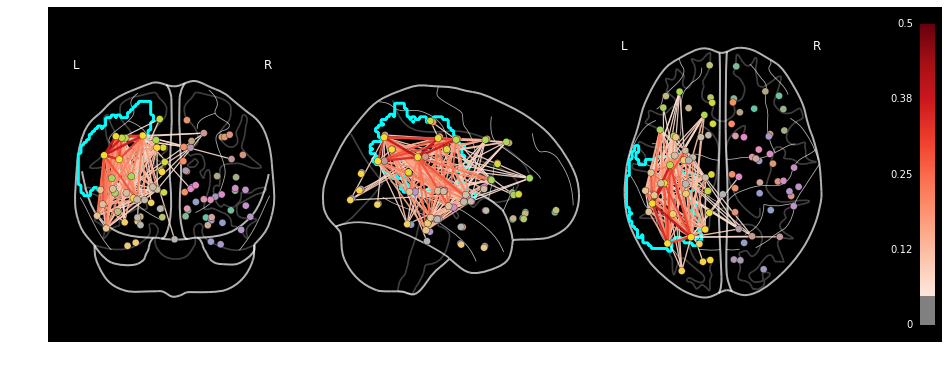

In [148]:
fig, ax = plt.subplots(figsize=(16,6))
display = plot_connectome(df_TPR.values,ccs_arr,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.05,axes=ax)
                
display.add_contours(lesion_img_bin,colors=['cyan'])
plt.savefig('/home/jgriffiths/Downloads/df_TPR_nilearn_connplot_cyanlesion.png', bbox_inches='tight',dpi=600)

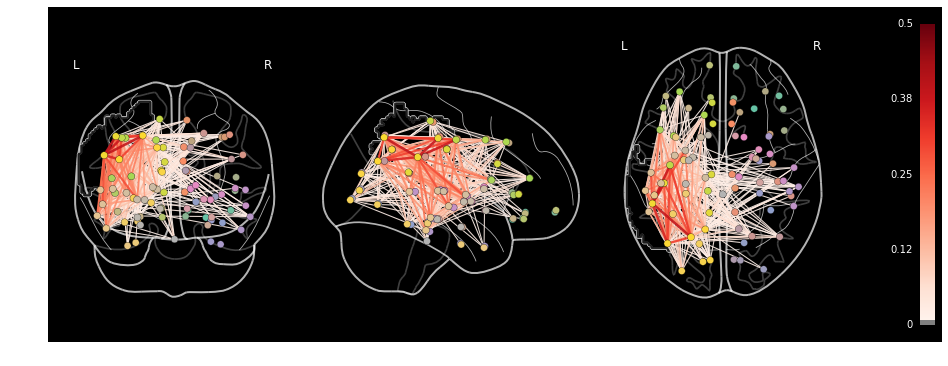

In [118]:
fig, ax = plt.subplots(figsize=(16,6))
display = plot_connectome(df_TPR.values,ccs_arr,colorbar=True,edge_vmin=0,edge_vmax=0.5,black_bg=True,edge_cmap='Reds',
                alpha=0.95,edge_kwargs={'alpha': 0.9},edge_threshold=0.01,axes=ax)

display.add_contours(lesion_img_bin)
plt.savefig('/home/jgriffiths/Downloads/df_TPR_nilearn_connplot.png', bbox_inches='tight',dpi=600)

In [123]:
from nilearn.plotting import plot_anat,plot_roi

In [135]:
f = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt_OLD/ConWhAt/scratch/mni_lesionmask_12331_rs1mm.nii.gz'
img = nib.load(f)
img_bin = nib.Nifti1Image((img.get_data()>0).astype(float),img.affine)

In [147]:
plot_roi(img_bin,
         vmin=0,vmax=2,draw_cross=False,alpha=0.5,annotate=False,dim=3.,
         output_file='/home/jgriffiths/Downloads/les_img.png')

In [ ]:
plot_roi('/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt_OLD/ConWhAt/scratch/mni_lesionmask_12331_rs1mm.nii.gz')

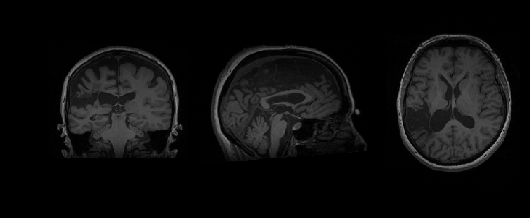

In [146]:
f = '/mnt/magneto-auto/baucis/jed/mridata/lilyproc/12331/12331_mprage.nii.gz'
#fig, ax = plt.subplots(figsize=(12,3))
plot_anat(f,draw_cross=False,annotate=False)
plt.savefig('/home/jgriffiths/Downloads/pat_img.png')#, bbox_inches='tight', dpi=600)

## Streamlinetric tract-based atlases

## Streamlinetric connectome-based atlases